In [1]:
library(tidyverse)
library(nycflights13)
IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


### Review

In [28]:
load("mi_census.RData")

Reshape the table to obtain:
<table>
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <td>
       <table>
<thead><tr><th scope="col">county</th><th scope="col">stat</th><th scope="col">2000</th><th scope="col">2010</th></tr></thead>
<tbody>
	<tr><td>washtenaw</td><td>income   </td><td>  51990  </td><td>  65500  </td></tr>
	<tr><td>washtenaw</td><td>pop      </td><td> 324491  </td><td> 345515  </td></tr>
	<tr><td>wayne    </td><td>income   </td><td>  40776  </td><td>  38380  </td></tr>
	<tr><td>wayne    </td><td>pop      </td><td>2059000  </td><td>1815000  </td></tr>
</tbody>
</table>
    </td>
    <td>
    <table>
<thead><tr><th scope="col">county</th><th scope="col">income_2000</th><th scope="col">population_2000</th><th scope="col">income_2010</th><th scope="col">population_2010</th></tr></thead>
<tbody>
	<tr><td>wayne    </td><td>40776    </td><td>2059000  </td><td>38380    </td><td>1815000  </td></tr>
	<tr><td>washtenaw</td><td>51990    </td><td> 324491  </td><td>65500    </td><td> 345515  </td></tr>
</tbody>
</table>
    </td>
    </tr>
    </table>

In [29]:
spread(mi_census, key=year, value=val)

  county    stat   2000    2010   
1 washtenaw income   51990   65500
2 washtenaw pop     324491  345515
3 wayne     income   40776   38380
4 wayne     pop    2059000 1815000

# Lecture 09: Relational Data
<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will understand:**
* [Keys](#Keys)
* Different types of [relations](#Relations) between tables
* [Commands for joining related tables together](#Outer-joins)
</div>


We have already spent a lot of time analyzing the `flights` table. In fact, there are four other tables in `nycflights13` that contain related information about these flights:

In [4]:
print(airlines)

# A tibble: 16 x 2
   carrier name                       
   <chr>   <chr>                      
 1 9E      Endeavor Air Inc.          
 2 AA      American Airlines Inc.     
 3 AS      Alaska Airlines Inc.       
 4 B6      JetBlue Airways            
 5 DL      Delta Air Lines Inc.       
 6 EV      ExpressJet Airlines Inc.   
 7 F9      Frontier Airlines Inc.     
 8 FL      AirTran Airways Corporation
 9 HA      Hawaiian Airlines Inc.     
10 MQ      Envoy Air                  
11 OO      SkyWest Airlines Inc.      
12 UA      United Air Lines Inc.      
13 US      US Airways Inc.            
14 VX      Virgin America             
15 WN      Southwest Airlines Co.     
16 YV      Mesa Airlines Inc.         


In [5]:
airports %>% filter(faa == "DTW")

  faa name                   lat      lon       alt tz dst tzone           
1 DTW Detroit Metro Wayne Co 42.21244 -83.35339 645 -5 A   America/New_York

In [6]:
print(planes)

# A tibble: 3,322 x 9
   tailnum  year type          manufacturer   model  engines seats speed engine 
   <chr>   <int> <chr>         <chr>          <chr>    <int> <int> <int> <chr>  
 1 N10156   2004 Fixed wing m… EMBRAER        EMB-1…       2    55    NA Turbo-…
 2 N102UW   1998 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 3 N103US   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 4 N104UW   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 5 N10575   2002 Fixed wing m… EMBRAER        EMB-1…       2    55    NA Turbo-…
 6 N105UW   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 7 N107US   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 8 N108UW   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 9 N109UW   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
10 N110UW   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
# … wi

In [7]:
print(weather)

# A tibble: 26,115 x 15
   origin  year month   day  hour  temp  dewp humid wind_dir wind_speed
   <chr>  <dbl> <dbl> <int> <int> <dbl> <dbl> <dbl>    <dbl>      <dbl>
 1 EWR     2013     1     1     1  39.0  26.1  59.4      270      10.4 
 2 EWR     2013     1     1     2  39.0  27.0  61.6      250       8.06
 3 EWR     2013     1     1     3  39.0  28.0  64.4      240      11.5 
 4 EWR     2013     1     1     4  39.9  28.0  62.2      250      12.7 
 5 EWR     2013     1     1     5  39.0  28.0  64.4      260      12.7 
 6 EWR     2013     1     1     6  37.9  28.0  67.2      240      11.5 
 7 EWR     2013     1     1     7  39.0  28.0  64.4      240      15.0 
 8 EWR     2013     1     1     8  39.9  28.0  62.2      250      10.4 
 9 EWR     2013     1     1     9  39.9  28.0  62.2      260      15.0 
10 EWR     2013     1     1    10  41    28.0  59.6      260      13.8 
# … with 26,105 more rows, and 5 more variables: wind_gust <dbl>, precip <dbl>,
#   pressure <dbl>, visib <dbl>,

Together these four tables form a *relational database*. The relationships can be graphed like so:
![table relationships](http://r4ds.had.co.nz/diagrams/relational-nycflights.png)

The particular relationships in this database are:
- `flights` connects to `planes` via `tailnum`.
- `flights` connects to `airlines` via `carrier`.
- `flights` connects to `airports` twice: via `origin` and `dest`.
- `flights` connects to `weather` via `origin` (the location), and `year`, `month`, `day` and `hour`.

## Keys
The "key" to understanding relational databases is... keys. 



### Primary Key
A *primary key* is a variable (or set of variables) that uniquely identifies an observation in its own table: there is **at most** one row in the table that corresponds to any setting of the columns which comprise the key.

In the `planes` table, each airplane is identified by its `tailnum`:

In [8]:
print(planes)

# A tibble: 3,322 x 9
   tailnum  year type          manufacturer   model  engines seats speed engine 
   <chr>   <int> <chr>         <chr>          <chr>    <int> <int> <int> <chr>  
 1 N10156   2004 Fixed wing m… EMBRAER        EMB-1…       2    55    NA Turbo-…
 2 N102UW   1998 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 3 N103US   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 4 N104UW   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 5 N10575   2002 Fixed wing m… EMBRAER        EMB-1…       2    55    NA Turbo-…
 6 N105UW   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 7 N107US   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 8 N108UW   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
 9 N109UW   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
10 N110UW   1999 Fixed wing m… AIRBUS INDUST… A320-…       2   182    NA Turbo-…
# … wi

The tail number of an airplane is assigned by a government agency and is unique: no two planes can have the same tail number. Thus, `tailnum` should be a primary key in this table. 

To check that one or more variables constitutes a primary key, we can group by those variables and then check that the number of distinct values equals the number of rows in the data set:

In [30]:
# planes %>% print
planes %>% summarize(n = n(), nd = n_distinct(tailnum))

  n    nd  
1 3322 3322

Compare with `flights`, where tailnum does *not* uniquely identify each row. (There are many flights present for the same airplane.)

In [31]:
distinct(flights, tailnum) %>% print

# A tibble: 4,044 x 1
   tailnum
   <chr>  
 1 N14228 
 2 N24211 
 3 N619AA 
 4 N804JB 
 5 N668DN 
 6 N39463 
 7 N516JB 
 8 N829AS 
 9 N593JB 
10 N3ALAA 
# … with 4,034 more rows


What is the primary key for the `flights` table?

In [39]:
flights %>% filter(is.na(tailnum)) %>% count(year, month, day, dep_time, tailnum) 

    year month day dep_time tailnum n 
1   2013 1      2  NA       NA       2
2   2013 1      3  NA       NA       2
3   2013 1      4  NA       NA       2
4   2013 1      5  NA       NA       1
5   2013 1      7  NA       NA       1
6   2013 1      8  NA       NA       1
7   2013 1      9  NA       NA       2
8   2013 1     10  NA       NA       2
9   2013 1     11  NA       NA       1
10  2013 1     12  NA       NA       2
11  2013 1     13  NA       NA       7
12  2013 1     14  NA       NA       1
13  2013 1     15  NA       NA       2
14  2013 1     16  NA       NA      24
15  2013 1     17  NA       NA       4
16  2013 1     18  NA       NA       3
17  2013 1     19  NA       NA       1
18  2013 1     20  NA       NA       1
19  2013 1     21  NA       NA       5
20  2013 1     22  NA       NA       3
21  2013 1     23  NA       NA       4
22  2013 1     24  NA       NA       4
23  2013 1     25  NA       NA      16
24  2013 1     26  NA       NA       2
25  2013 1     27  NA    

We might guess that `year`, `month`, `day`, and `tailnum` are sufficient to identify each row in `flights`, but this is not true:

In [12]:
flights %>% summarize(n=n(), nd=n_distinct(year, month, day, tailnum))

  n      nd    
1 336776 251727

In fact, even restricting to the exact *minute* that an airplane departed is not sufficient:

In [13]:
flights %>% summarize(n=n(), nd=n_distinct(tailnum, time_hour, minute))

  n      nd    
1 336776 336367

This says that there are certain airplanes that are marked as having departed more than once in the same year, month, day, hour and minute. We can inspect these rows as follows:

In [14]:
group_by(flights, tailnum, time_hour, minute) %>% count %>% filter(n>1) %>% arrange(tailnum, time_hour) %>% print

# A tibble: 298 x 4
# Groups:   tailnum, time_hour, minute [298]
   tailnum time_hour           minute     n
   <chr>   <dttm>               <dbl> <int>
 1 N11119  2013-06-10 16:00:00     55     2
 2 N11192  2013-08-26 08:00:00     30     2
 3 N12563  2013-02-04 16:00:00     19     2
 4 N12564  2013-01-13 20:00:00      0     2
 5 N12900  2013-07-10 21:00:00     29     2
 6 N13969  2013-01-28 07:00:00     59     2
 7 N14148  2013-03-12 06:00:00     30     2
 8 N14558  2013-04-19 13:00:00     29     2
 9 N14916  2013-02-11 13:00:00     15     2
10 N14974  2013-07-26 06:00:00     30     2
# … with 288 more rows


These likely indicate rounding or data entry errors.

### Exercise
What constitutes a primary key in the `mpg` table?

In [55]:
mpg %>% mutate(k = row_number()) %>% print(width=Inf)

# A tibble: 234 x 12
   manufacturer model      displ  year   cyl trans      drv     cty   hwy fl   
   <chr>        <chr>      <dbl> <int> <int> <chr>      <chr> <int> <int> <chr>
 1 audi         a4           1.8  1999     4 auto(l5)   f        18    29 p    
 2 audi         a4           1.8  1999     4 manual(m5) f        21    29 p    
 3 audi         a4           2    2008     4 manual(m6) f        20    31 p    
 4 audi         a4           2    2008     4 auto(av)   f        21    30 p    
 5 audi         a4           2.8  1999     6 auto(l5)   f        16    26 p    
 6 audi         a4           2.8  1999     6 manual(m5) f        18    26 p    
 7 audi         a4           3.1  2008     6 auto(av)   f        18    27 p    
 8 audi         a4 quattro   1.8  1999     4 manual(m5) 4        18    26 p    
 9 audi         a4 quattro   1.8  1999     4 auto(l5)   4        16    25 p    
10 audi         a4 quattro   2    2008     4 manual(m6) 4        20    28 p    
   class       k
  

## Relations
A primary key and the corresponding foreign key in another table form a *relation*. Relations come in several forms:
- *One-to-many*. (Most common). For example, each flight has one plane, but each plane has many flights. 
- *Many-to-many*: For example, each airline flies to many airports; each airport hosts many airlines.
- *One-to-one*. Each row in one table corresponds uniquely to a row in a second table. This is relatively uncommon because you could just as easily combine the two tables into one.

In [16]:
x = tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     3, "x3"
)
y = tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2",
     4, "y3"
)

## Joins
Joins are the way the we combine or "merge" two data tables based on keys.
To understand how joins work we'll study these two simple tables:
![simple tables](http://r4ds.had.co.nz/diagrams/join-setup.png)

In [56]:
x
y

  key val_x
1 1   x1   
2 2   x2   
3 3   x3   

  key val_y
1 1   y1   
2 2   y2   
3 4   y3   

The first column of each table is called `key` and serves as the primary key: each row has a different value of `key`. 

Let's image all the possible ways we could join together these two tables. Each intersecting line represents a potential match; there are 3 observations in each table for a total of $3^2=9$ intersections.
![possible joins](http://r4ds.had.co.nz/diagrams/join-setup2.png)

Matches will be indicated with dots:
![match example](http://r4ds.had.co.nz/diagrams/join-inner.png)

### Inner joins
Inner joins match a pair of observations whenever their keys are equal:
![match example](http://r4ds.had.co.nz/diagrams/join-inner.png)

In [58]:
x %>% inner_join(y, by = "key")

Joining, by = "key"


  key val_x val_y
1 1   x1    y1   
2 2   x2    y2   

Note that there is no row for `key=3` or `key=4`: with an inner join, unmatched rows are not included in the result. For this reason, we do not as often use inner joins for data analysis since you can easily lose observations.

### Outer joins
An outer join keeps observations that appear in at least one of the tables. There are three types of outer joins:
- A left join keeps all observations in x.
- A right join keeps all observations in y.
- A full join keeps all observations in x and y.

![outer join](http://r4ds.had.co.nz/diagrams/join-outer.png)

Left joins are the most common. Use them to look up data in another table, but preserve your original observations when there in cases where the other table does not have a match.

### Example
The `flights` table has a `carrier` column which is a two-letter code for the airline. The `airlines` table maps these code to recognizable airline names. You can combine the `airlines` and `flights` data frames with `left_join()`:

In [65]:
left_join(flights, airlines) %>% count(name)
    #select(year, month, day, tailnum, carrier, name) %>% 
    

Joining, by = "carrier"


   name                        n    
1  AirTran Airways Corporation  3260
2  Alaska Airlines Inc.          714
3  American Airlines Inc.      32729
4  Delta Air Lines Inc.        48110
5  Endeavor Air Inc.           18460
6  Envoy Air                   26397
7  ExpressJet Airlines Inc.    54173
8  Frontier Airlines Inc.        685
9  Hawaiian Airlines Inc.        342
10 JetBlue Airways             54635
11 Mesa Airlines Inc.            601
12 SkyWest Airlines Inc.          32
13 Southwest Airlines Co.      12275
14 United Air Lines Inc.       58665
15 US Airways Inc.             20536
16 Virgin America               5162

### Exercise
Use `left_join()` to determine:
<table>
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <tr>
        <td>The number of flights operated by Envoy Air.</td>
        <td>The number of flights that departed in sub-zero conditions (<code>temp < 0</code>) in 2013.</td>
    </tr>
    </table>

In [72]:
## Solution
# Beginner
# count(flights, carrier) %>% 
#     left_join(airlines, by = "carrier") %>% 
#     filter(name == "Envoy Air")

flights %>% left_join(weather) %>% filter(temp < 32, !is.na(temp)) %>% print

Joining, by = c("year", "month", "day", "origin", "hour", "time_hour")


# A tibble: 25,844 x 28
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <dbl> <dbl> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1     2055           2100        -5     2350           2355
 2  2013     1     1     2056           2100        -4     2337           2343
 3  2013     1     1     2056           2100        -4     2240           2235
 4  2013     1     1     2057           2100        -3     2237           2220
 5  2013     1     1     2058           2100        -2     2342           2317
 6  2013     1     1     2058           2100        -2     2235           2230
 7  2013     1     1     2058           2100        -2        8           2359
 8  2013     1     1     2100           2100         0     2307           2250
 9  2013     1     1     2102           2108        -6      146            158
10  2013     1     1     2103           2110        -7     2345             17
# … with 25,834 more rows, a

### Duplicate keys
Although we have defined keys in terms of uniqueness, it's not required that a key be unique. There are several possibilities:

##### One table has duplicate keys
This is useful when you want to add in additional information as there is typically a one-to-many relationship.
![duplicate keys](http://r4ds.had.co.nz/diagrams/join-one-to-many.png)

In fact, we already saw an example of this above when we joined `planes` to `flights`: each plane belongs to potentially many flights.

### Exercise
Reproduce the table:
<table>
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <tr>
        <td>The number of flights flown by each carrier:
        <table>
<thead><tr><th scope="col">name</th><th scope="col">n</th></tr></thead>
<tbody>
	<tr><td>United Air Lines Inc.      </td><td>58665                      </td></tr>
	<tr><td>JetBlue Airways            </td><td>54635                      </td></tr>
	<tr><td>ExpressJet Airlines Inc.   </td><td>54173                      </td></tr>
	<tr><td>&#8942;  </td><td>&#8942;</td></tr>
</tbody>
</table>
        </td>
        <td>The most common model of airplane used by each carrier:
            
<table>
<thead><tr><th scope="col">name</th><th scope="col">model</th><th scope="col">n</th></tr></thead>
<tbody>
	<tr><td>JetBlue Airways            </td><td>A320-232                   </td><td>34063                      </td></tr>
	<tr><td>ExpressJet Airlines Inc.   </td><td>EMB-145LR                  </td><td>28027                      </td></tr>
	<tr><td>United Air Lines Inc.      </td><td>737-824                    </td><td>13809                      </td></tr>
	<tr><td>&#8942;  </td><td>&#8942;</td><td>&#8942;</td></tr>
</tbody>
</table>
</td>
    </tr>
    </table>

In [21]:
flights %>% left_join(airlines) %>% left_join(planes)

Joining, by = "carrier"
Joining, by = c("year", "tailnum")


       year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1      2013 1     1   517      515             2         830      819          
2      2013 1     1   533      529             4         850      830          
3      2013 1     1   542      540             2         923      850          
4      2013 1     1   544      545            -1        1004     1022          
5      2013 1     1   554      600            -6         812      837          
6      2013 1     1   554      558            -4         740      728          
7      2013 1     1   555      600            -5         913      854          
8      2013 1     1   557      600            -3         709      723          
9      2013 1     1   557      600            -3         838      846          
10     2013 1     1   558      600            -2         753      745          
11     2013 1     1   558      600            -2         849      851          
12     2013 1     1   558      600      

##### Both tables have duplicate keys
This represents a many-to-many join and is usually an error since they key does not uniquely identify observations in either table. Joining duplicated keys results in the Cartesian product of all the possible matches:
![cartesian](http://r4ds.had.co.nz/diagrams/join-many-to-many.png)

Be careful when doing many-to-many merges. It's very easy to generate huge tables by accident and crash R.
### Exercise
To understand what the weather conditions were when each flight departed, I will join the weather table to the first 100 rows of the flights table using the command

```
flights %>% slice(1:100) %>% left_join(weather, by=c("origin", "hour"))
```

1.  How many rows *should* the resulting table have?
2.  How many rows *does* the resulting table have?

In [75]:
flights %>% slice(1:100) %>% left_join(weather, by=c("origin", "hour")) %>% print

# A tibble: 36,344 x 32
   year.x month.x day.x dep_time sched_dep_time dep_delay arr_time
    <int>   <int> <int>    <int>          <int>     <dbl>    <int>
 1   2013       1     1      517            515         2      830
 2   2013       1     1      517            515         2      830
 3   2013       1     1      517            515         2      830
 4   2013       1     1      517            515         2      830
 5   2013       1     1      517            515         2      830
 6   2013       1     1      517            515         2      830
 7   2013       1     1      517            515         2      830
 8   2013       1     1      517            515         2      830
 9   2013       1     1      517            515         2      830
10   2013       1     1      517            515         2      830
# … with 36,334 more rows, and 25 more variables: sched_arr_time <int>,
#   arr_delay <dbl>, carrier <chr>, flight <int>, tailnum <chr>, origin <chr>,
#   dest <chr>, air_t

### Defining the key columns
When we do a join using `left_join()`, R take as the key whatever column names the two tables have in common:

In [86]:
left_join(flights, planes) %>% print
   # select(year, month, day, origin, type, tailnum, manufacturer) %>% 
   # print

Joining, by = c("year", "tailnum")


# A tibble: 336,776 x 26
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# … with 336,766 more rows,

This is called a *natural join*. If the key column(s) are named differently in the two tables, we must specify the mapping between the two using the `key=` parameter.

Consider joining `airports` to `flights`:
```
> left_join(flights, airports)
Error: `by` required, because the data sources have no common variables
Traceback:

1. left_join(flights, airports)
2. left_join.tbl_df(flights, airports)
3. common_by(by, x, y)
4. common_by.NULL(by, x, y)
5. bad_args("by", "required, because the data sources have no common variables")
6. glubort(fmt_args(args), ..., .envir = .envir)
7. .abort(text)
```

This has produced an error, because airports and flights do not have any columns in common. Indeed, the three digit FAA code is called `faa` in `airports`, but appears as either `origin` or `dest` in `flights`. To fix the error, we must specify which of `origin` or `dest` should be matched:

In [95]:
# flights_loc <- left_join(flights, airports, by = c("origin" = "faa")) %>% 
#    left_join(airports, by = c("dest" = "faa"))

Warning message:
“Removed 7 rows containing missing values (geom_segment).”

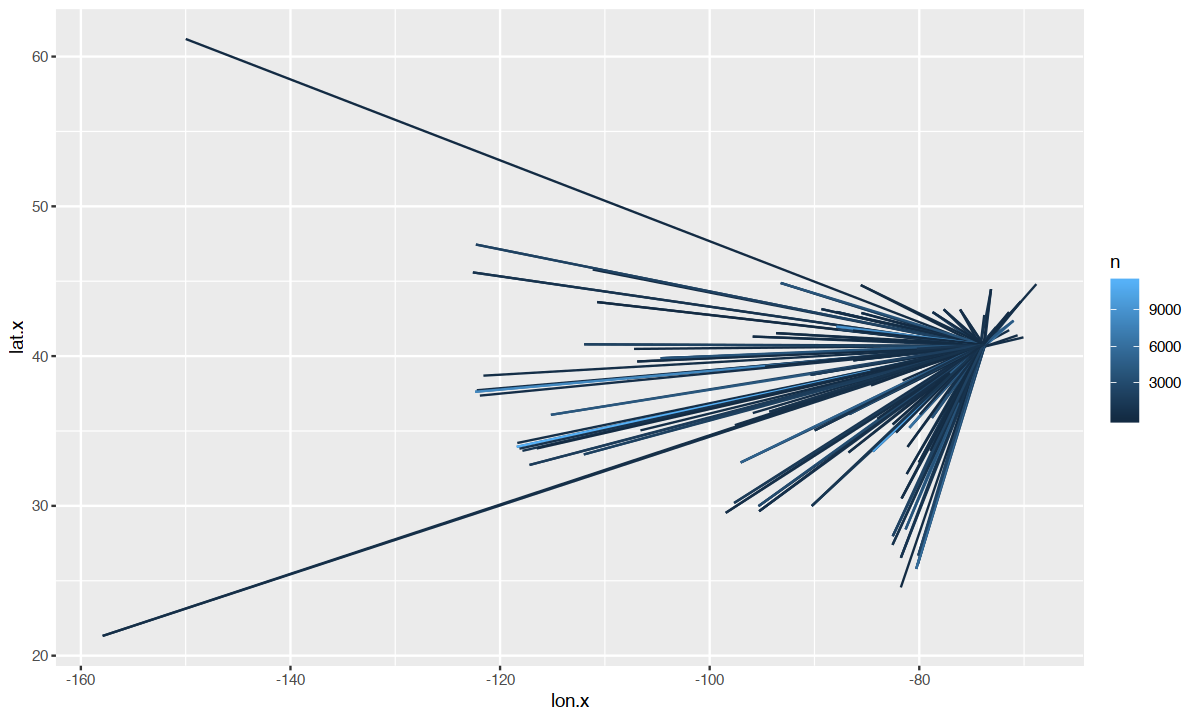